In [1]:
# Import some necessary library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV, LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv")

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0  33.6                     0.627   50        1
1            1       85             66             29        0  26.6                     0.351   31        0
2            8      183             64              0        0  23.3                     0.672   32        1
3            1       89             66             23       94  28.1                     0.167   21        0
4            0      137             40             35      168  43.1                     2.288   33        1

In [5]:
df.shape

(768, 9)

In [7]:
df["Outcome"].unique()

array([1, 0], dtype=int64)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
pf = ProfileReport(df)

In [11]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

# Observation
1). Some of the columns are normally distributed.
2). Some of the columns have zeros value.
3). There are no null value present in our dataset.
4). There are some skeweness present in some of the columns

In [13]:
# Here we are going to handle the zeros value
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())

In [15]:
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].mean())

In [16]:
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].mean())

In [17]:
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].mean())

In [18]:
df['BMI'] = df['BMI'].replace(0, df['BMI'].mean())

In [19]:
pf1 = ProfileReport(df)

In [20]:
pf1.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

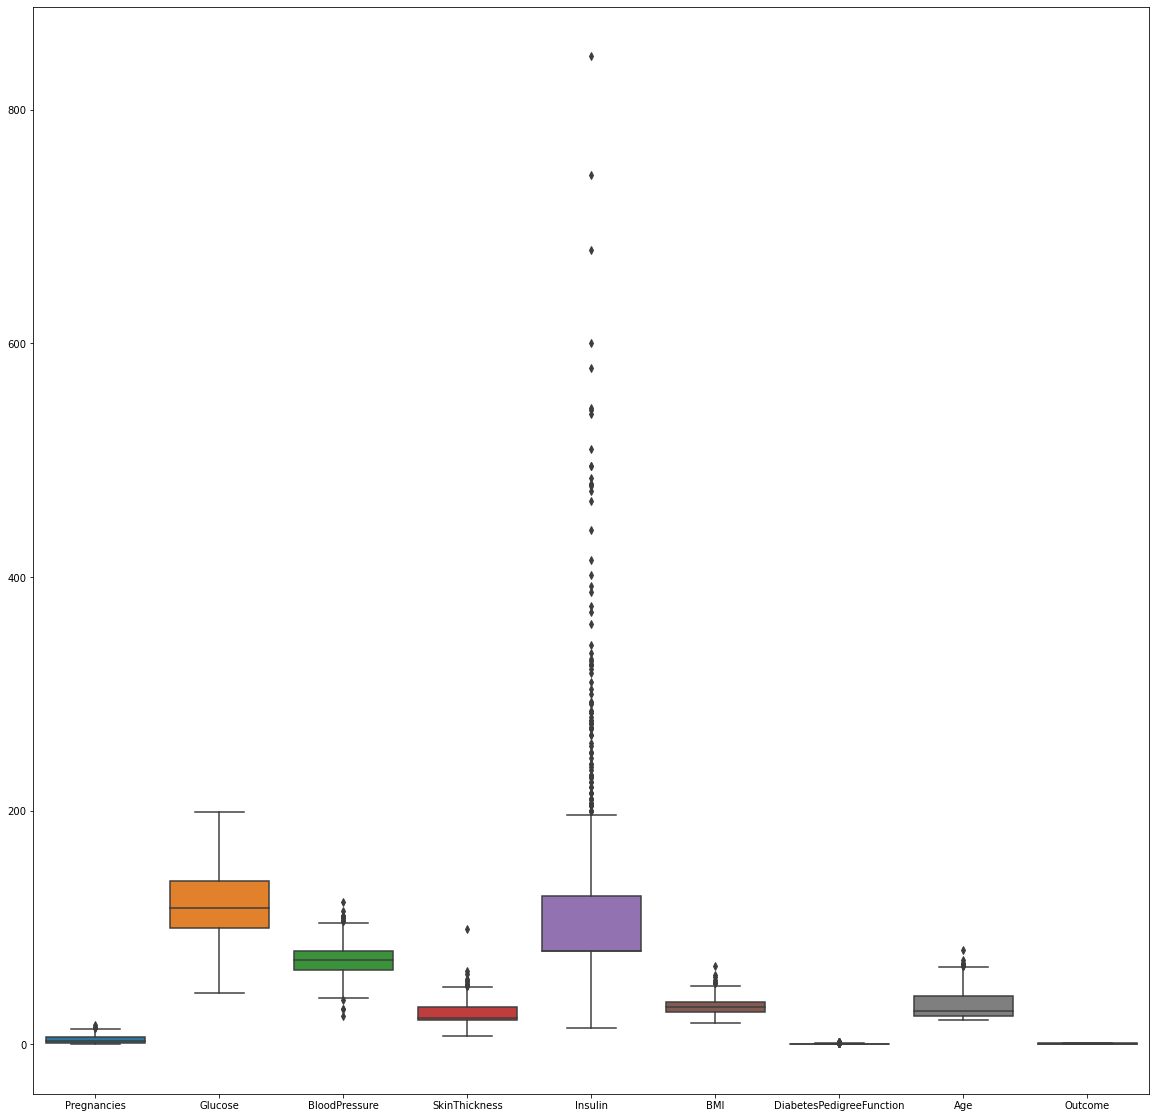

In [21]:
# Now we are going to handle outlier.
fig,ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df, ax = ax)

# According to Box Plot 
1). There are some outliers in Pregnancies feature.
2). No outlier present in Glucose feature.
3). There are some negative as well as postive outlier present in Bloodpressure feature.
4). Postive outlier present in SkinThickness feature.
5). Lots of outlier present in Insulin feature.
6). Some postive outlier present in BMI, DiabetesPedigreeFunction, Age.
7). So our next step is handle this outlier to improve accuracy of our final model.

In [27]:
# Removing outlier from Pregnancies
q = df['Pregnancies'].quantile(0.98)
df_new = df[df['Pregnancies'] < q]

# Removing outlier from BloodPressure
q = df_new['BloodPressure'].quantile(0.99)
df_new = df_new[df_new['BloodPressure']<q]

# Removing outlier from  SkinThickness
q = df_new['SkinThickness'].quantile(0.99)
df_new = df_new[df_new['SkinThickness']<q]

# Removing outlier from Insulin
q = df_new['Insulin'].quantile(0.95)
df_new = df_new[df_new['Insulin']<q]

# Removing outlier from  BMI
q = df_new['BMI'].quantile(0.99)
df_new = df_new[df_new['BMI']<q]

#Removing outlier from DiabetesPedigreeFunction
q = df_new['DiabetesPedigreeFunction'].quantile(0.99)
df_new = df_new[df_new['DiabetesPedigreeFunction']<q]


In [28]:
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6    148.0           72.0      35.000000   79.799479  33.6                     0.627   50        1
1              1     85.0           66.0      29.000000   79.799479  26.6                     0.351   31        0
2              8    183.0           64.0      20.536458   79.799479  23.3                     0.672   32        1
3              1     89.0           66.0      23.000000   94.000000  28.1                     0.167   21        0
5              5    116.0           74.0      20.536458   79.799479  25.6                     0.201   30        0
..           ...      ...            ...            ...         ...   ...                       ...  ...      ...
763           10    101.0           76.0      48.000000  180.000000  32.9                     0.171   63        0
764            2    122.0           70.0      27.000000   79.799479  36.8                     0.340   27        0
765            5    121.0           72.0      23.000000  112.000000  26.2                     0.245   30        0
766            1    126.0           60.0      20.536458   79.799479  30.1                     0.349   47        1
767            1     93.0           70.0      31.000000   79.799479  30.4                     0.315   23        0

[677 rows x 9 columns]

<AxesSubplot:>

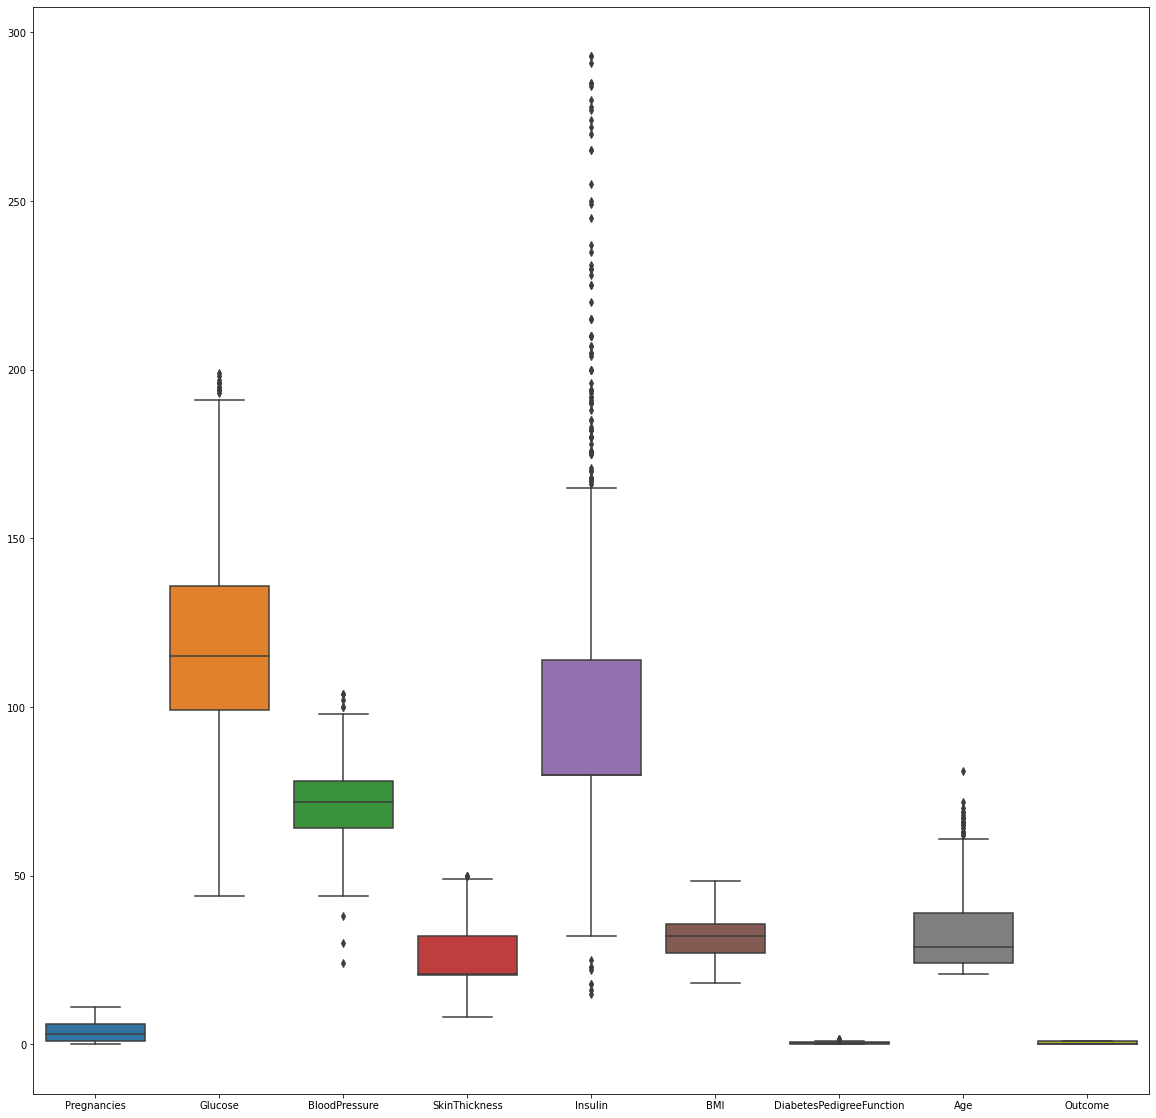

In [29]:
# Now Ploting box plot again
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new)

In [30]:
pf2 = ProfileReport(df_new)

In [31]:
pf2.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
# Now we are going to apply standardscaling technique because our dataset flucating a lot.
y = df_new['Outcome']
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 677, dtype: int64

In [33]:
X = df_new.drop(columns = 'Outcome')
X

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  DiabetesPedigreeFunction  Age
0              6    148.0           72.0      35.000000   79.799479  33.6                     0.627   50
1              1     85.0           66.0      29.000000   79.799479  26.6                     0.351   31
2              8    183.0           64.0      20.536458   79.799479  23.3                     0.672   32
3              1     89.0           66.0      23.000000   94.000000  28.1                     0.167   21
5              5    116.0           74.0      20.536458   79.799479  25.6                     0.201   30
..           ...      ...            ...            ...         ...   ...                       ...  ...
763           10    101.0           76.0      48.000000  180.000000  32.9                     0.171   63
764            2    122.0           70.0      27.000000   79.799479  36.8                     0.340   27
765            5    121.0           72.0      23.000000  112.000000  26.2                     0.245   30
766            1    126.0           60.0      20.536458   79.799479  30.1                     0.349   47
767            1     93.0           70.0      31.000000   79.799479  30.4                     0.315   23

[677 rows x 8 columns]

In [37]:
scaler = StandardScaler()
ProfileReport(pd.DataFrame(scaler.fit_transform(X)))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

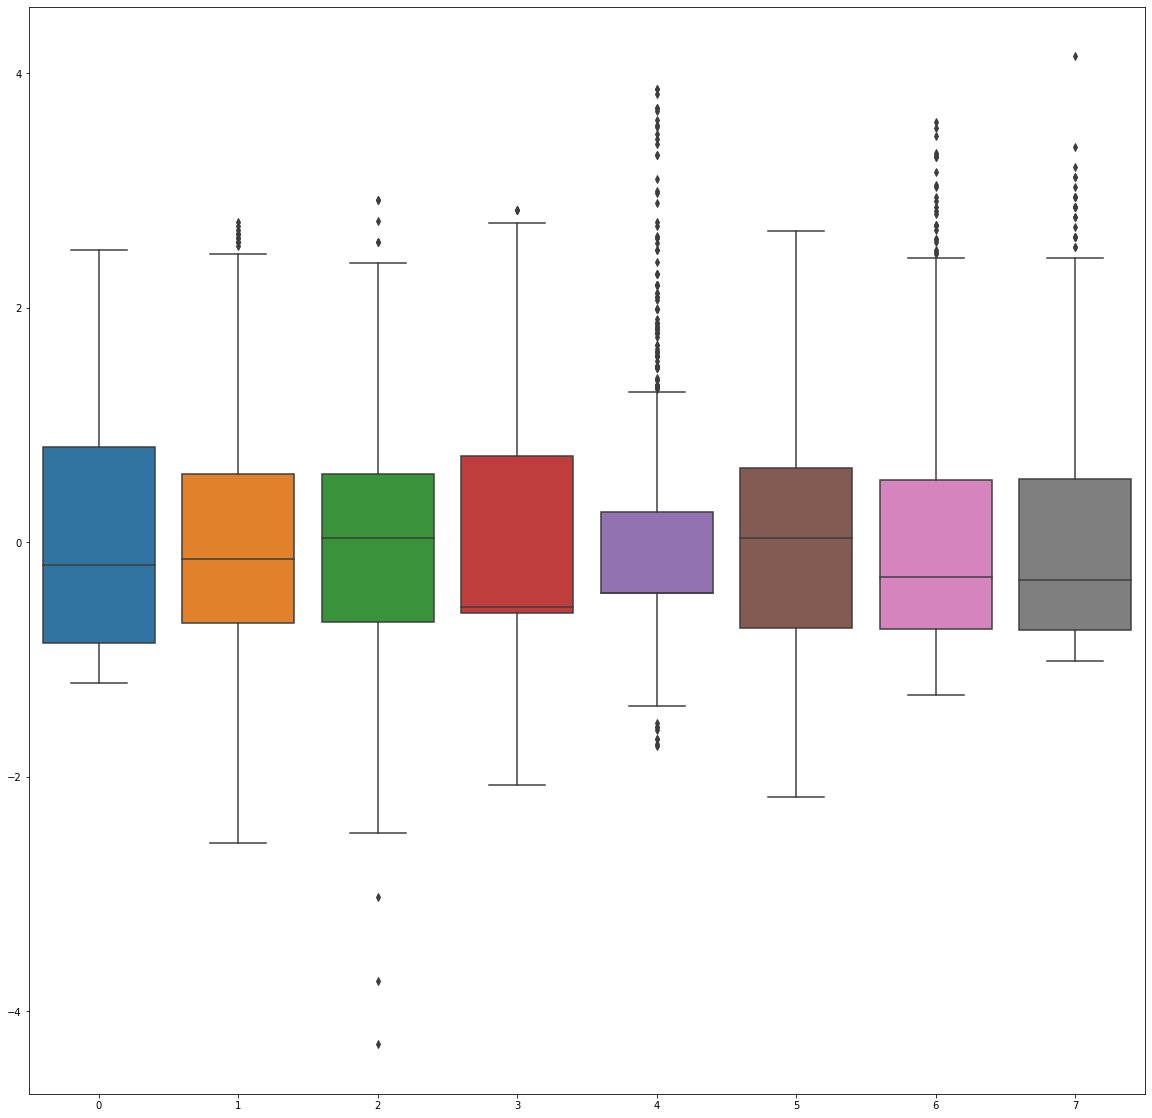

In [38]:
df_new_scaler = (pd.DataFrame(scaler.fit_transform(X)))
fig, ax = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scaler)

In [39]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.81236589,  0.98809056,  0.03782304, ...,  0.2950166 ,
         0.61654532,  1.48144268],
       [-0.86335533, -1.16629389, -0.50216513, ..., -0.82751459,
        -0.3480835 , -0.15074552],
       [ 1.48265437,  2.18497081, -0.68216118, ..., -1.35670787,
         0.77382175, -0.06484087],
       ...,
       [ 0.47722164,  0.06478294,  0.03782304, ..., -0.89165923,
        -0.71855688, -0.23665016],
       [-0.86335533,  0.23576583, -1.04215329, ..., -0.266249  ,
        -0.35507356,  1.22372875],
       [-0.86335533, -0.89272127, -0.14217302, ..., -0.21814052,
        -0.47390465, -0.83798265]])

In [40]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 677, dtype: int64

In [41]:
X_scaled.shape

(677, 8)

In [42]:
df_vif = pd.DataFrame()

In [50]:
df_vif['features'] = X_scaled.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [47]:
df_vif['features']

0                 Pregnancies
1                     Glucose
2               BloodPressure
3               SkinThickness
4                     Insulin
5                         BMI
6    DiabetesPedigreeFunction
7                         Age
8                     Outcome
Name: features, dtype: object

In [51]:
[variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

[1.3942774705334102,
 1.3143577417456263,
 1.241784222331754,
 1.469451275191548,
 1.292506919127524,
 1.500201719110073,
 1.0469497693418777,
 1.5787323116659764]

# Observation according to VIF 
no multicolinariety present is our dataset, so in that case i don't have to drop any column.

In [52]:
# Now spliting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=132)

In [53]:
x_train

array([[ 0.81236589, -0.48236232, -0.14217302, ..., -0.15399588,
        -1.14844581,  0.36468233],
       [ 0.81236589,  0.98809056,  0.03782304, ...,  0.2950166 ,
         0.61654532,  1.48144268],
       [-0.86335533, -0.34557601, -1.04215329, ..., -1.01994851,
         1.73495553, -1.00979193],
       ...,
       [-0.19306685, -0.41396917, -0.86215724, ..., -1.42085251,
         0.79479194, -0.83798265],
       [-0.52821109, -0.92691784, -0.86215724, ..., -0.0257066 ,
        -1.12048555, -0.75207801],
       [-1.19849958, -0.61914864, -0.86215724, ..., -1.58121411,
        -0.40050898, -0.66617337]])

In [54]:
x_test

array([[-1.19849958, -0.75593495, -0.68216118, ...,  0.80817371,
         0.52217945, -0.66617337],
       [-0.86335533,  0.20156925, -1.94213357, ...,  0.24690812,
         1.78738101, -0.40845944],
       [ 0.47722164,  1.33005634, -0.14217302, ..., -0.31435748,
        -0.8513681 ,  2.59820302],
       ...,
       [ 0.1420774 , -1.4740631 , -0.86215724, ...,  0.35916124,
        -0.20828222, -0.66617337],
       [ 0.47722164, -0.07200338,  1.83778359, ...,  0.3751974 ,
        -0.39701394,  0.45058698],
       [-0.86335533, -1.43986652, -1.4021454 , ...,  0.24690812,
         2.79744524, -0.75207801]])

In [55]:
# Creating object of logistic regression model here solver is by default lbfgs
logr = LogisticRegression(verbose=1)

In [56]:
logr.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

In [57]:
x_test[0]

array([-1.19849958, -0.75593495, -0.68216118,  1.20106363, -0.02768859,
        0.80817371,  0.52217945, -0.66617337])

In [58]:
# This is the prediction
logr.predict([x_test[0]])

array([0], dtype=int64)

In [59]:
# This is the probability of class
logr.predict_proba([x_test[0]])

array([[0.84791473, 0.15208527]])

In [60]:
# This is the logirithm probability of prediction
logr.predict_log_proba([x_test[0]])

array([[-0.1649752 , -1.88331393]])

In [61]:
y_test.iloc[0]

0

In [62]:
y_test.iloc[1]

1

In [63]:
x_test[1]

array([-0.86335533,  0.20156925, -1.94213357,  1.66786017,  1.32216179,
        0.24690812,  1.78738101, -0.40845944])

In [64]:
logr.predict([x_test[1]])

array([0], dtype=int64)

In [65]:
logr.predict_log_proba([x_test[1]])

array([[-0.45619521, -1.00427565]])

In [66]:
logr.predict_proba([x_test[1]])

array([[0.63369012, 0.36630988]])

In [70]:
# Second model where solver is liblinear
logr_linear = LogisticRegression(verbose=1, solver='liblinear')

In [71]:
logr_linear.fit(x_train, y_train)

[LibLinear]

LogisticRegression(solver='liblinear', verbose=1)

In [72]:
logr_linear.predict([x_test[0]])

array([0], dtype=int64)

In [73]:
logr_linear.predict_proba([x_test[0]])

array([[0.84598734, 0.15401266]])

In [74]:
logr_linear.predict_log_proba([x_test[0]])

array([[-0.16725089, -1.87072046]])

Here we are created two first one is logr and logr_linear, In logr model we are using by defalut solver that lbfgs and in logr_linear model we are using solver that is liblinear.

In [75]:
# first model
logr

LogisticRegression(verbose=1)

In [76]:
# Second model
logr_linear

LogisticRegression(solver='liblinear', verbose=1)

In [78]:
y_pred_liblinear = logr_linear.predict(x_test)

In [79]:
y_pred_liblinear

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [80]:
y_pred_default = logr.predict(x_test)

In [81]:
y_pred_default

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0], dtype=int64)

In [82]:
confusion_matrix(y_test, y_pred_default)

array([[88,  7],
       [18, 23]], dtype=int64)

In [86]:
confusion_matrix(y_test, y_pred_liblinear)

array([[88,  7],
       [18, 23]], dtype=int64)

In [91]:
def model_eval(y_true, y_pred):
    tn,fp,fn,tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tn+tp)/(tn+fp+fn+tp)
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    specificity = tn/(fp+tn)
    f1_score = 2*(recall*precision)/(recall+precision)
    result = {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "Specificity": specificity, 'F1-Score': f1_score}
    return result

In [92]:
model_eval(y_test, y_pred_default)

{'Accuracy': 0.8161764705882353,
 'Precision': 0.7666666666666667,
 'Recall': 0.5609756097560976,
 'Specificity': 0.9263157894736842,
 'F1-Score': 0.6478873239436621}

In [102]:
model_eval(y_test, y_pred_liblinear)

{'Accuracy': 0.8161764705882353,
 'Precision': 0.7666666666666667,
 'Recall': 0.5609756097560976,
 'Specificity': 0.9263157894736842,
 'F1-Score': 0.6478873239436621}

In [99]:
roc_auc_score(y_test, y_pred_default)

0.7436456996148909

In [103]:
auc = roc_auc_score(y_test, y_pred_liblinear)

In [96]:
roc_curve(y_test, y_pred_default)

(array([0.        , 0.07368421, 1.        ]),
 array([0.        , 0.56097561, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [104]:
fpr, tpr, theresolds = roc_curve(y_test, y_pred_liblinear)

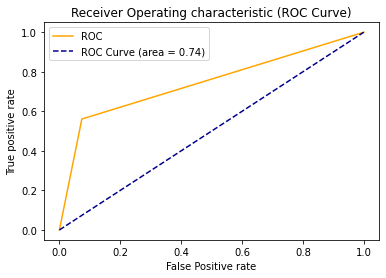

In [106]:
# Ploting a ROC and AUC graph
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--', label = "ROC Curve (area = %0.2f)" % auc)
plt.xlabel("False Positive rate")
plt.ylabel("True positive rate")
plt.title("Receiver Operating characteristic (ROC Curve)")
plt.legend()
plt.show()